# Week 2 - Question 11

### First some basic setup for 11a
#### Do imports and load an image

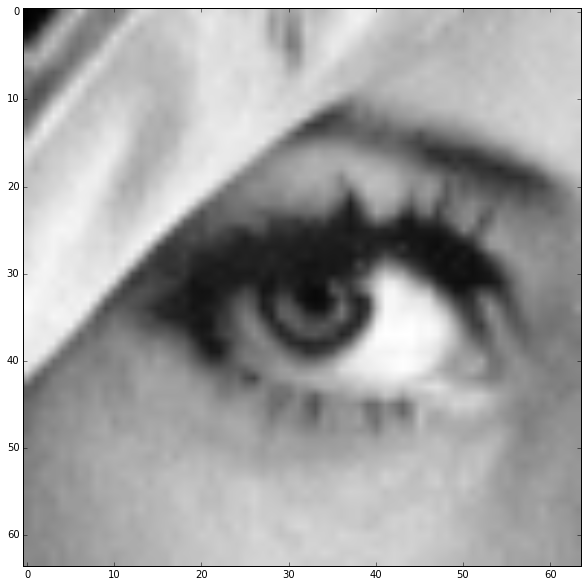

In [24]:
%matplotlib inline

#import typical packages I'll be using
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10  #boiler plate to set the size of the figures
plt.gray()  #start with gray scale image

#Load a test image - convert to a single channel, and display as a gray scale image
#im = cv2.imread("camera_man.png")[:,:,0]
#Only use part of the image to start
#im = im[32:96,64:128]

#Or use lena - useful had less compression artifacts than my camera_man
im = cv2.imread("lena.tiff")
#convert for matplotlib from brg to Y CR CB for display
im = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)
#use only the Y channel
im = im[:,:,0]
#Only use part of the image to start
im = im[232:296,232:296]

plt.imshow(im)

# Question 11a

- Do a basic implementation of JPEG.
 - Divide the image into non-overlapping 8x8 blocks.
 - Compute the DCT (discrete cosine transform) of each block. This is implemented in popular packages such as Matlab.
 - Quantize each block. You can do this using the tables in the video or simply divide each coefficient by N, round the result to the nearest integer, and multiply back by N. Try for different values of N. You can also try preserving the 8 largest coefficients (out of the total of 8x8=64), and simply rounding them to the closest integer.
 - Visualize the results after you invert the quantization and the DCT.

## Divide the image into non-overlaping 8x8 blocks

In [25]:
w,h = im.shape
block_size = 8

In [26]:
blocks = np.zeros((block_size,block_size,w/block_size,h/block_size),np.int)
for r in range(h/block_size):
    for c in range(w/block_size):
        blocks[r,c] = (im[r*block_size : (r+1)*block_size, c*block_size : (c+1)*block_size])

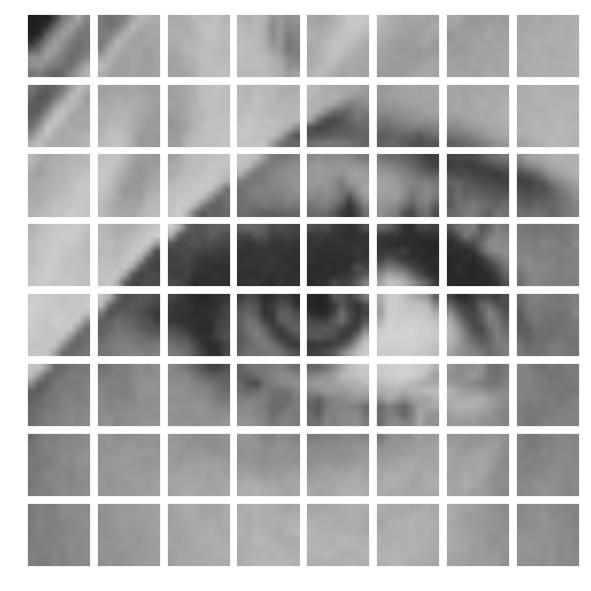

In [27]:
f, axarr = plt.subplots(h/block_size, w/block_size)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.01, hspace=.01)

for r in range(h/block_size):
    for c in range(w/block_size):
        axarr[r,c].imshow(blocks[r,c],vmin=0, vmax=255)
        axarr[r,c].axis('equal')
        axarr[r,c].axis('off')

# Compute the DCT

In [28]:
dct = np.empty_like(blocks).astype(np.float32)

for r in range(h/block_size):
    for c in range(w/block_size):
        dct[r,c] = cv2.dct(np.float32(blocks[r,c]))  #opencv wants 32 bit floats for cvt

In [29]:
# reviewing the effects of the dct - here is a block
blocks[4,0]

array([[202, 204, 200, 199, 193, 197, 197, 197],
       [206, 203, 200, 198, 193, 200, 197, 203],
       [207, 202, 199, 200, 201, 196, 201, 189],
       [203, 198, 197, 204, 201, 200, 194, 141],
       [202, 197, 193, 198, 199, 199, 147, 105],
       [200, 197, 196, 195, 194, 152, 103, 109],
       [196, 194, 198, 195, 152, 108,  99, 112],
       [195, 197, 195, 160, 109, 104, 113, 117]])

In [30]:
# here is the computed dct for the same 8x8 block
dct[0,0]

array([[  9.30750000e+02,  -1.47086868e+02,  -5.58635292e+01,
         -2.18874512e+01,   7.75000000e+00,  -3.09967065e+00,
         -9.43794727e-01,   4.30474710e+00],
       [ -1.18708954e+02,  -1.33695160e+02,  -9.38833923e+01,
          5.70787125e+01,  -3.67022604e-01,   1.02096891e+01,
         -4.36500454e+00,   3.04462624e+00],
       [ -3.50173721e+01,  -8.17970200e+01,   8.96549530e+01,
          5.27591858e+01,  -1.57087669e+01,  -3.04230022e+00,
         -1.69763966e+01,  -1.29344273e+00],
       [  9.19927311e+00,   4.45065155e+01,   3.75410347e+01,
         -1.71638346e+00,  -4.23446751e+00,   5.92470264e+00,
         -6.75283623e+00,   8.52841282e+00],
       [ -1.19999695e+01,  -2.02828808e+01,   4.71224976e+00,
         -6.54378700e+00,  -1.00000000e+01,   3.64256120e+00,
         -9.52862358e+00,  -1.23580962e-01],
       [  2.09285069e+00,   5.44304657e+00,   9.55029106e+00,
         -1.07122307e+01,   4.25778913e+00,  -3.98499966e+00,
         -1.02628241e+01,   5.0

# Quantize each block

In [31]:
#quantize matrix from book 8.30b

normalization = np.asarray(
[16, 11, 10, 16, 24, 40, 51, 61, 
 12, 12, 14, 19, 26, 58, 60, 55, 
 14, 13, 16, 24, 40, 57, 69, 56, 
 14, 17, 22, 29, 51, 87, 80, 62,
 18, 22, 37, 56, 68, 109, 103, 77,
 24, 35, 55, 64, 81, 104, 113, 92,
 49, 64, 78, 87, 103, 121, 120, 101,
 72, 92, 95, 98, 112, 100, 103, 99]
).reshape(8,8)

In [32]:
quantized = np.empty_like(dct)

for r in range(h/block_size):
    for c in range(w/block_size):
        quantized[r,c] = dct[r,c]/normalization

quantized = quantized.astype(np.int)

In [33]:
quantized[0,0]

array([[ 58, -13,  -5,  -1,   0,   0,   0,   0],
       [ -9, -11,  -6,   3,   0,   0,   0,   0],
       [ -2,  -6,   5,   2,   0,   0,   0,   0],
       [  0,   2,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

# Visualize the results after you invert the quantization and the DCT.

In [34]:
inverted = np.empty_like(quantized)

for r in range(h/block_size):
    for c in range(w/block_size):
        inverted[r,c] = cv2.idct(np.float32(quantized[r,c]*normalization))  #invert quantization and dct

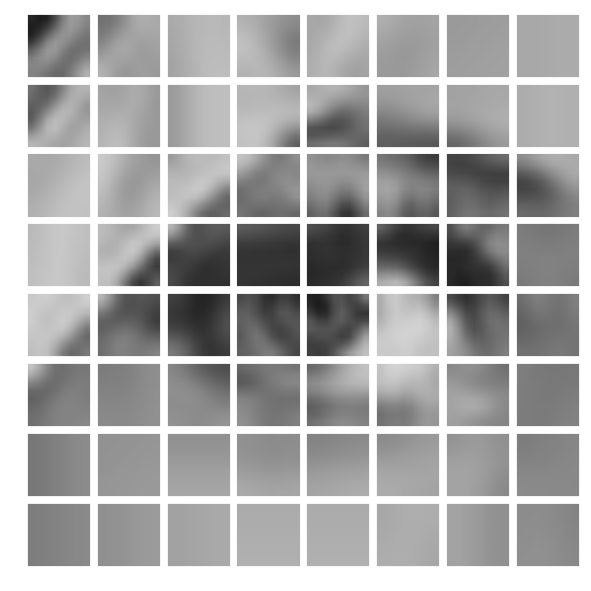

In [35]:
f, axarr = plt.subplots(h/block_size, w/block_size)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.01, hspace=.01)

for r in range(h/block_size):
    for c in range(w/block_size):
        axarr[r,c].imshow(inverted[r,c],vmin=0, vmax=255)
        axarr[r,c].axis('equal')
        axarr[r,c].axis('off')

## Comparison before and after

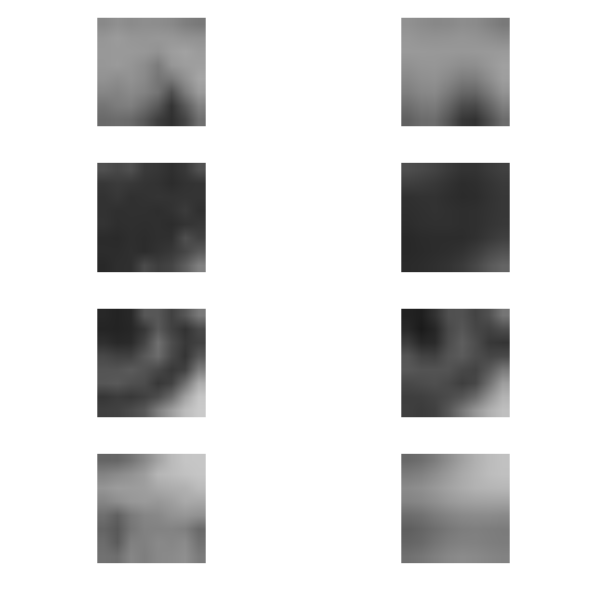

In [39]:
#Left side pre-compression, right side post-compression
f, axarr = plt.subplots(4,2)
for i in range(4):
        axarr[i,0].imshow(blocks[2+i,4],vmin=0, vmax=255)
        axarr[i,0].axis('equal')
        axarr[i,0].axis('off')
        
        axarr[i,1].imshow(inverted[2+i,4],vmin=0, vmax=255)
        axarr[i,1].axis('equal')
        axarr[i,1].axis('off')

In [40]:
#An example showing the movement of values from image -> dct -> quantized -> invert_quantiziation -> invert_dct 
print blocks[4,7,0]
print dct[4,7,0].astype(np.int)
print quantized[4,7,0]
print (quantized[4,7]*normalization)[0]
print inverted[4,7,0]

[109 123 130 124 121 118 121 128]
[920 -37 -13 -19  -3  -5   5   1]
[57 -3 -1 -1  0  0  0  0]
[912 -33 -10 -16   0   0   0   0]
[110 119 127 125 118 115 120 128]


# Repeat the above but instead of using the DCT, use the FFT (Fast Fourier Transform).

C:\Users\root\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


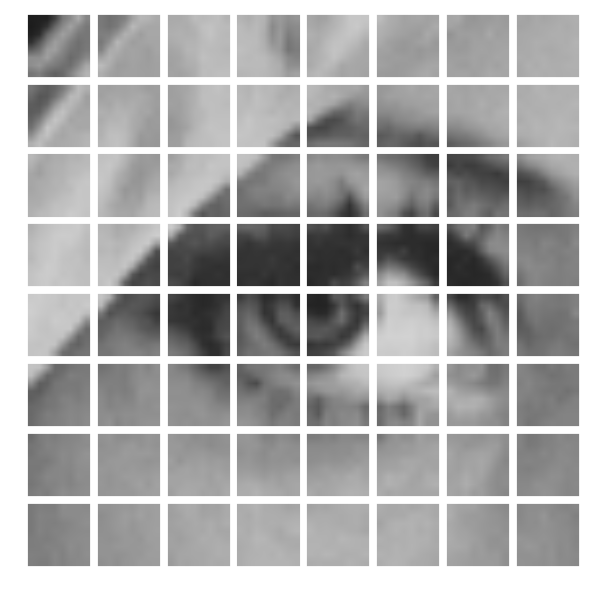

In [49]:
fft = np.empty_like(blocks).astype(np.complex)

for r in range(h/block_size):
    for c in range(w/block_size):
        fft[r,c] = np.fft.fft(blocks[r,c])
        #cv2.dft(np.float32(blocks[r,c]))  #opencv wants 32 bit floats for dft
        
quantized = np.empty_like(fft)

for r in range(h/block_size):
    for c in range(w/block_size):
        quantized[r,c] = fft[r,c]/normalization

inverted = np.empty_like(quantized).astype(np.complex)

for r in range(h/block_size):
    for c in range(w/block_size):
        inverted[r,c] = np.fft.ifft(quantized[r,c]*normalization)
        #cv2.idft(np.float32(quantized[r,c]*normalization))  #invert quantization and dft
    
inverted = inverted.astype(np.int)

f, axarr = plt.subplots(h/block_size, w/block_size)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.01, hspace=.01)

for r in range(h/block_size):
    for c in range(w/block_size):
        axarr[r,c].imshow(inverted[r,c],vmin=0, vmax=255)
        axarr[r,c].axis('equal')
        axarr[r,c].axis('off')

In [47]:
#An example showing the movement of values from image -> dct -> quantized -> invert_quantiziation -> invert_dct 
print blocks[6,7,0]
print fft[6,7,0]
print quantized[6,7,0]
print (quantized[6,7]*normalization)[0]
print inverted[6,7,0]

[131 119 122 128 129 136 132 133]
[ 1030.00000000 +0.j            -6.48528137+25.55634919j
     6.00000000 +6.j            10.48528137 +5.55634919j
    -2.00000000 +0.j            10.48528137 -5.55634919j
     6.00000000 -6.j            -6.48528137-25.55634919j]
[ 64.37500000+0.j          -0.58957103+2.32330447j   0.60000000+0.6j
   0.65533009+0.34727182j  -0.08333333+0.j           0.26213203-0.13890873j
   0.11764706-0.11764706j  -0.10631609-0.41895654j]
[ 1030.00000000 +0.j            -6.48528137+25.55634919j
     6.00000000 +6.j            10.48528137 +5.55634919j
    -2.00000000 +0.j            10.48528137 -5.55634919j
     6.00000000 -6.j            -6.48528137-25.55634919j]
[131 119 122 128 129 136 132 133]


# Repeat the above JPEG-type compression but don’t use any transform, simply perform quantization on the original image.

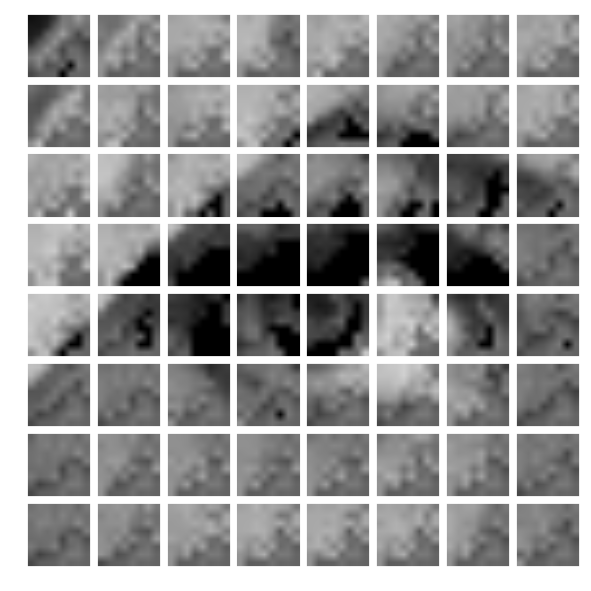

In [50]:
quantized = np.empty_like(blocks)

for r in range(h/block_size):
    for c in range(w/block_size):
        quantized[r,c] = blocks[r,c]/normalization

quantized = quantized.astype(np.int)

inverted = np.empty_like(quantized)

for r in range(h/block_size):
    for c in range(w/block_size):
        inverted[r,c] = (quantized[r,c]*normalization)
    
inverted = inverted.astype(np.int)

f, axarr = plt.subplots(h/block_size, w/block_size)
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.01, hspace=.01)

for r in range(h/block_size):
    for c in range(w/block_size):
        axarr[r,c].imshow(inverted[r,c],vmin=0, vmax=255)
        axarr[r,c].axis('equal')
        axarr[r,c].axis('off')

# Color Images and Beyond in Part 2 - coming soon